In [ ]:
# nltk.download('averaged_perceptron_tagger')
# nltk.download('punkt')

In [12]:
## load dependencie# mathmpy as np  #numeric    
import ast  # dict literal evaluation 
import re   # regular expression 
import matplotlib.pyplot as plt # data visualization
import pytesseract as pt        # Optical Character Recognition 
from pytesseract import Output  # Output format
import spacy    # name entity regognition toolkit
from spacy import displacy  # 
import en_core_web_sm   # language core 
nlp = en_core_web_sm.load() # core of natural language processing
import numpy as np  # math toolkit
import cv2  # visual computation dependecy

In [13]:
## Read txt file as dict more data available (i.e., position, size and level info)
def read_dict(txt_file_path):
    
    # open file 
    txt_file = open(txt_file_path,'r')

    # read data in txt file
    txt_raw = txt_file.read()

    # read the content as dictionary 
    txt_as_dict  = ast.literal_eval(txt_raw)
    
    # close the file
    txt_file.close()
    
    return txt_as_dict

In [14]:
## Read info

#  Read text file 
class_1_yes_a = 'data/txt/AHC-0000343 loss runs PIO-YES0.txt'

# Read image corresponding to txt file
class_1_yes_a_image = 'data/images/AHC-0000343 loss runs PIO-YES0.jpg'

# Read as dict format
txt_dict = read_dict(class_1_yes_a)

In [15]:
# load rules
from configobj import ConfigObj

# load configuration file
template_rules = ConfigObj('config_file.ino')

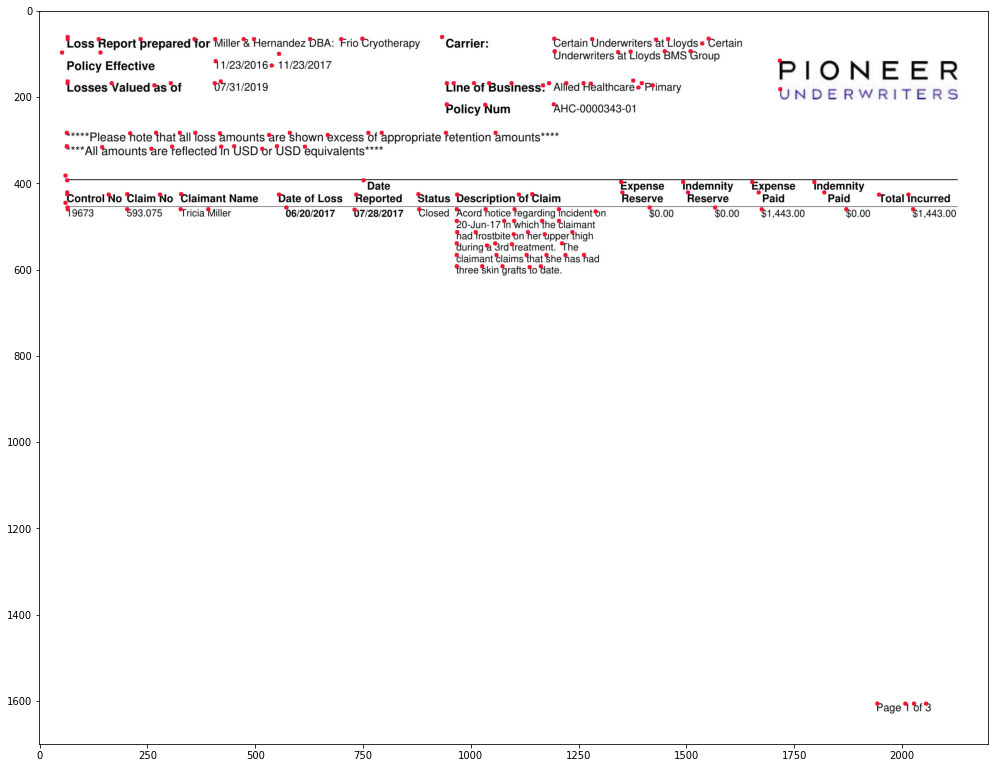

In [16]:
# Extract the sentenses in order to check if the data points are in the text
#
import cv2

# create an all text string
sentences = ' '.join(txt_dict['text']).upper()

# read report image
image_all = cv2.imread(class_1_yes_a_image)

# chek 
for key, item in enumerate(template_rules):

    # Check if data point is in text    
    for i in template_rules[item]:
        if i in sentences:
            for line in range(len(txt_dict['text'])):

                if i in sentences.upper():

                    # draw each word 
                    cv2.circle(image_all, (txt_dict['left'][line], txt_dict['top'][line]),5,(240,20,50),-1)

plt.figure(figsize=(17,30))
plt.imshow(image_all)


In [17]:
## Map the dictionary to string transform

# get subjets in ocr result
import numpy as np
elements = len(txt_dict['text'])
x = np.zeros(shape= (elements,1),dtype = int)
y = np.zeros(shape= (elements,1), dtype = int)
pos = []
string_result = ''
for i in range (elements):
    string_result+= txt_dict['text'][i] + ' '
    pos.append(len(string_result))
    x[i] = txt_dict['left'][i]
    y[i] = txt_dict['top'][i]



In [18]:
string_result_up = string_result.upper()
_pos = pos.index(string_result_up.index('LOSS REPORT'))
print(txt_dict['text'][_pos + 1])

Loss


In [ ]:
## TEST CELL, IGNORE IT

# laod image 
_image = cv2.imread(class_1_yes_a_image)

# text to search
data_point = template_rules['loss date'][0]

# find text coords
_index = pos.index(sentences.index(data_point)) + 1

# x , y choords search
x = txt_dict['left'][_index] 
y = txt_dict['top'][_index]

plt.figure(figsize=(14,10))
plt.imshow(cv2.circle(_image,(x,y),10,(0,0,255),-1))

In [19]:
## filter the data points in text

for _,key in enumerate(template_rules):
    for i in range(len(template_rules[key])):
       
        data_point = template_rules[key][i]
        # find text coords
        try:
            _index = pos.index(sentences.index(data_point)) + 1
            # x , y 
            x = txt_dict['left'][_index] 
            y = txt_dict['top'][_index]
            
        except:
            pass 
            
plt.figure(figsize=(14,10))        
plt.imshow(cv2.circle(_image,(x,y),10,(0,0,255),-1))
plt.show()

NameError: name '_image' is not defined

In [ ]:
## Tokenize sentces
nlp = spacy.load("en_core_web_sm")
doc = nlp(sentences)
_token = []
for ent in doc.ents:
    _token +=[(ent.text,ent.label_)]
_token
_listX = [0,0]
_listY = [0,0]
_Min_distance = [0,0]
data_point = template_rules['loss date'][0]
_index = pos.index(sentences.index(data_point)) + 1
_listX[0] = (txt_dict['left'][_index])
_listY[0] = (txt_dict['top'][_index])


#for i in range (len(_token)):
#_index = pos.index(sentences.index(data_point)) + 1
#x = txt_dict['left'][_index] 
#y = txt_dict['top'][_index]

In [ ]:
_aux=100000000
for i in range (len(_token)):
    if 'DATE' in _token[i]:
        _index_tuple = pos.index(sentences.index(_token[i][0]))
        _listX[1] = (txt_dict['left'][_index_tuple])
        _listY[1] = (txt_dict['top'][_index_tuple])
        _aux1 = ((_listX[0]-_listX[1])**2 + (_listY[0] - _listY[1])**2)**.5
        if _aux1 < _aux:
            _aux = _aux1
            _Min_distance= [_listX[1], _listY[1]]

plt.figure(figsize=(14,10))
plt.imshow(cv2.circle(_image,(_Min_distance[0],_Min_distance[1]),10,(0,0,255),-1))

# Improve name entities recognition #
## retrain model ##


In [ ]:
## test cell 

try: 
    sentences.index(template_rules['expense paid'][0])

except:
    asociate_terms = template_rules['expense paid'][0].split(' ')

    


In [ ]:
def in_in_neighbour(_split, radius = 50):
    

In [87]:

def search_rules (dictionary, rules):
## valores base de la función
#dictionary = txt_dict
#rules = template_rules
    #radius =  .02 * np.sqrt(np.array(dictionary['top']).max()**2 + np.array(dictionary['left']).max()**2)
    radius = 200
    # convert in string, for search rules pourpuses
    new_sentences = ' '.join(dictionary['text']).upper()
    _tuple_rules = []

    ## search for data points of interest

    # iterate througth each data point 
    for _, item in enumerate(rules):

        # search every combination of rules
        for i in range(len(rules[item])):
            
            # try to found complete rule
            try: 
                _pos = pos.index(new_sentences.index(template_rules[item][i]))
                print(new_sentences.index(template_rules[item][i]))
                ## !! se tiene que modificar
                _tuple_rules += [(rules[item][i],_pos)]
            
            # try to split the grammar rule
            except:
                
                # search word by word
                asociate_terms = rules[item][i].split(' ')
                #print('asociate terms: ' + f'{asociate_terms}')
                #print('asociate term:' + asociate_terms[0])
                # if the first word in sentences
                if asociate_terms[0] in new_sentences:
                    # get the position
                    position = pos.index(new_sentences.index(asociate_terms[0]))+1
                    #print('searching for: ' + f'{asociate_terms[0]}')
                    # get x, and y coords
                    coord_x = txt_dict['left'][position]
                    coord_y = txt_dict['top'][position]
                    #print('there it is: ' + txt_dict['text'][position].upper())
                    
                    # string for search
            
                    _aux = []
                    # search first match radius (i.e, DATE neighborhood -> date report, date loss, loss date, etc)
                    for j in range(len(txt_dict['text'])):

                        # calculate the distance in neighborhood
                        dist_euc = np.sqrt((coord_x-txt_dict['left'][j])**2 + (coord_y-txt_dict['top'][j])**2)
                        if dist_euc <= radius:
                            _aux.append(txt_dict['text'][j].upper())

                                                                 
                    # 
                    _aux_rules =rules[item][i].split(' ')
                    #print(_aux)
                    #print(_aux_rules)
                    #if rules[item][i] in _aux:
                    
                    if all(elem in _aux for elem in _aux_rules):
                        #print('word in 50 units of ratio:' + f'{_aux}')

                        _tuple_rules += [(rules[item][i],pos.index(new_sentences.index(asociate_terms[0])))]
                        
                       
                        
                else:
                    #print('there is not: ' + f'{asociate_terms[0]} in file')
                    pass
            #print('-'*20)
    return _tuple_rules

In [88]:
J = search_rules(dictionary = txt_dict, rules = template_rules)

70
16
589
260


ValueError: 621 is not in list

In [ ]:
new_senten

('CARRIER', 13)
('PREPARED FOR', 5)
('CLAIMANT', 111)
('AS OF', 49)
('DATE REPORTED', 101)
('STATUS', 114)
('EXPENSE RESERVE', 102)
('INDEMNITY RESERVE', 103)
('INDEMNITY PAID', 103)


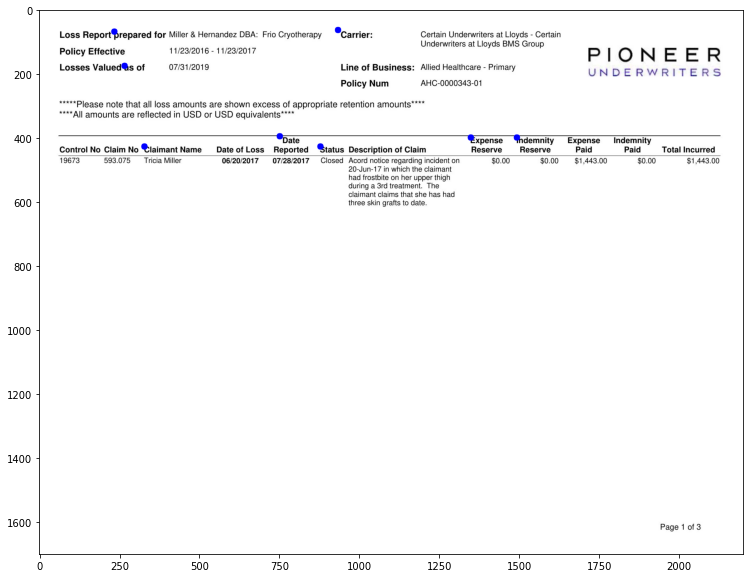

In [85]:
## view results
import cv2

# 
_image_c = cv2.imread(class_1_yes_a_image)

for i in range (len(J)):
    print(J[i])
    cv2.circle(_image_c,(txt_dict['left'][J[i][1]+1],txt_dict['top'][J[i][1]+1]),10,(0,0,255),-1)

plt.figure(figsize=(15,10))
plt.imshow(_image_c)

'ATEb sdfg gdfr dfrg dg'